In [309]:
import geopandas as gpd
from tqdm import tqdm
import libpysal as lp
import json
import pandas as pd
from matplotlib.patches import Patch  # used for the plot legends later

###  Get the data in the folder ./LCPS_data for pre-processing. Let's call this `retrieved data`.

In [123]:
def retrieve_data(sy):
    """
    Retrieve data for a given school year (sy)
    """
    data_dir = "./LCPS_data"
    # Read the data files
    schools = gpd.read_file('{}/LCPS_Sites_{}.shp'.format(data_dir, sy))
    students = gpd.read_file('{}/Students_{}.shp'.format(data_dir, sy))
    spas = gpd.read_file('{}/PlanningZones_{}.shp'.format(data_dir, sy))
    
    return schools, students, spas


In [124]:
sy = '2017_2018'

In [125]:
# raw_schools, raw_students, raw_spas = retrieve_data(sy)

###  Get the processed data from the folder ./data

In [126]:
#spas_processed = gpd.read_file('new_SPAs_2017_2018.json', driver='GeoJSON')
spas = gpd.read_file('./data/new_SPAs_2017_2018.json', driver='GeoJSON')
students = gpd.read_file('./data/new_Students_2017_2018.json', driver='GeoJSON')
schools = gpd.read_file('./data/new_Schools_2017_2018.json', driver='GeoJSON')




#new line to run the newly downloaded json files, should move around anywhere.
#new line to run the newly downloaded json files, should move around anywhere.

In [127]:
#students.head()
#schools.head()
spas.head()

#uncomment the one you want to see

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_N,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6..."
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6..."
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1..."
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5..."
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1..."


## Analysis Using New SPAs Data

In [128]:
spas.keys()

Index(['OBJECTID', 'COUNT_', 'SPA', 'ELEM_', 'INT_', 'HIGH_', 'ELEM_CODE',
       'MID_CODE', 'HIGH_CODE', 'DISTRICT', 'UTILITIES', 'SHAPE_Leng',
       'SHAPE_Area', 'STDYAREA_1', 'DISTRICT_1', 'PLANNING_Z', 'ELEM', 'MID',
       'HIGH', 'UTILITIE_1', 'DISTRICT_2', 'MID_2018', 'HIGH_2018', 'PK', 'KG',
       'GR1', 'GR2', 'GR3', 'GR4', 'GR5', 'GR6', 'GR7', 'GR8', 'GR9', 'GR10',
       'GR11', 'GR12', 'TOTAL_KG_5', 'TOTAL_6_8', 'TOTAL_9_12', 'TOTAL_KG_1',
       'TOTAL_PK_1', 'ELEM_POP', 'MID_POP', 'HIGH_POP', 'TOT_POP',
       'ELEM_POP_A', 'ELEM_POP_W', 'ELEM_POP_M2', 'ELEM_POP_B', 'ELEM_POP_H',
       'ELEM_POP_N', 'ELEM_POP_P', 'MID_POP_A', 'MID_POP_W', 'MID_POP_M2',
       'MID_POP_B', 'MID_POP_H', 'MID_POP_N', 'MID_POP_P', 'HIGH_POP_A',
       'HIGH_POP_W', 'HIGH_POP_M2', 'HIGH_POP_B', 'HIGH_POP_H', 'HIGH_POP_N',
       'HIGH_POP_P', 'TOT_POP_A', 'TOT_POP_W', 'TOT_POP_M2', 'TOT_POP_B',
       'TOT_POP_H', 'TOT_POP_N', 'TOT_POP_P', 'geometry'],
      dtype='object')

In [402]:
# Choose possible grade level; ELEM, MID, HIGH for SPAs

grade = 'ELEM'
spas_ethnic = spas[['{}_CODE'.format(grade) , '{}_POP_A'.format(grade) , '{}_POP_W'.format(grade) , '{}_POP_M2'.format(grade) ,\
             '{}_POP_B'.format(grade) , '{}_POP_H'.format(grade) , '{}_POP_N'.format(grade) , '{}_POP_P'.format(grade), '{}_POP'.format(grade)]]
spas_grouped_raw = spas_ethnic.groupby(['{}_CODE'.format(grade) ]).sum()
spas_grouped = spas_grouped_raw.div(spas_grouped_raw['{}_POP'.format(grade)], axis=0)
spas_grouped.head()

#when generalizing one place to change and use the FORMAT style

,ELEM_POP_A,ELEM_POP_W,ELEM_POP_M2,ELEM_POP_B,ELEM_POP_H,ELEM_POP_N,ELEM_POP_P,ELEM_POP
ELEM_CODE,,,,,,,,
ALD,0.091837,0.596939,0.091837,0.045918,0.173469,0.000000,0.000000,1.0
ALG,0.070640,0.640177,0.075055,0.044150,0.163355,0.004415,0.002208,1.0
ARC,0.367983,0.381497,0.074844,0.080042,0.087318,0.007277,0.001040,1.0
ASH,0.214168,0.490939,0.070840,0.074135,0.148270,0.000000,0.001647,1.0
BAL,0.085761,0.553398,0.050162,0.090615,0.207120,0.006472,0.006472,1.0


In [232]:
#gives summary statistics

#spas_grouped.describe()

In [425]:
import itertools

abs_diffs = []
for row in spas_grouped.iterrows():
    diffs = [abs(val[1] - val[0]) for val in itertools.permutations(row[1], 2)]
    total = int(sum(diffs)/2)
    abs_diffs.append(total)

spas_grouped.loc[:,'ABS_DIFF'] = abs_diffs
# spas_grouped
    
# def sumPairs(lst): 
      
#     diffs = []
#     for i, x in enumerate(lst):
#         for j, y in enumerate(lst):
#             if i != j: 
#                 diffs.append(abs(x-y))
              
#     return int(sum(diffs)/2)    

# def sumPairs(lst): 
#     diffs = [abs(e[1] - e[0]) for e in itertools.permutations(lst, 2)]
#     return int(sum(diffs)/2)


,ELEM_POP_A,ELEM_POP_W,ELEM_POP_M2,ELEM_POP_B,ELEM_POP_H,ELEM_POP_N,ELEM_POP_P,ELEM_POP,ABS_DIFF
ELEM_CODE,,,,,,,,,
ALD,0.091837,0.596939,0.091837,0.045918,0.173469,0.000000,0.000000,1.0,10
ALG,0.070640,0.640177,0.075055,0.044150,0.163355,0.004415,0.002208,1.0,10
ARC,0.367983,0.381497,0.074844,0.080042,0.087318,0.007277,0.001040,1.0,9
ASH,0.214168,0.490939,0.070840,0.074135,0.148270,0.000000,0.001647,1.0,9
BAL,0.085761,0.553398,0.050162,0.090615,0.207120,0.006472,0.006472,1.0,10
BAN,0.004525,0.660633,0.027149,0.072398,0.230769,0.004525,0.000000,1.0,11
BST,0.215038,0.566917,0.075188,0.049624,0.088722,0.004511,0.000000,1.0,10
BUF,0.328956,0.440901,0.063790,0.086304,0.068168,0.008755,0.003127,1.0,9
CAT,0.015581,0.654391,0.056657,0.072238,0.195467,0.004249,0.001416,1.0,10


In [434]:
spas_grouped_raw.loc[:, 'ELEM_POP_NW'] = spas_grouped_raw.loc[:,'ELEM_POP_A'] +  spas_grouped_raw.loc[:,'ELEM_POP_B'] +  spas_grouped_raw.loc[:,'ELEM_POP_M2']\
            +  spas_grouped_raw.loc[:,'ELEM_POP_H'] + spas_grouped_raw.loc[:,'ELEM_POP_N'] + spas_grouped_raw.loc[:,'ELEM_POP_P']
# spas_grouped_raw.drop(['ELEM_POP_A', 'ELEM_POP_B', 'ELEM_POP_H', 'ELEM_POP_M2', 'ELEM_POP_N', 'ELEM_POP_P'], axis='columns')
spas_grouped_raw

whites = spas_grouped_raw['ELEM_POP_W']
non_whites = spas_grouped_raw['ELEM_POP_NW'] 
ind_diss = 0.5 * sum(abs(whites/whites.sum() - non_whites/non_whites.sum()))
ind_diss

0.2713933068918799

In [451]:
from numpy import log
spas_grouped.head()
asians = spas_grouped['ELEM_POP_A']
whites = spas_grouped['ELEM_POP_W']
mixed = spas_grouped['ELEM_POP_M2']
blacks = spas_grouped['ELEM_POP_B']
hispanics = spas_grouped['ELEM_POP_H']
native = spas_grouped['ELEM_POP_N']
pacifics = spas_grouped['ELEM_POP_P']
non_whites = spas_grouped['ELEM_POP_NW']

# entropy = -(asians*log(asians) + whites*log(whites) + mixed*log(mixed) + blacks*log(blacks) + \
#         hispanics*log(hispanics) + native*log(native) + pacifics*log(pacifics))

entropy = -(non_whites*log(non_whites) + whites*log(whites))

entropy.replace(float('NaN'),0, inplace=True)
spas_grouped.loc[:,'ENTROPY_IND'] = entropy
spas_grouped
spas_grouped[spas_grouped['ENTROPY_IND']<0.45][['ELEM_POP_W', 'ELEM_POP_NW','ENTROPY_IND']]
# spas_grouped[spas_grouped['ENTROPY_IND']==0]

# The maximum value for the entropy index (ENTROPY_IND) is ln(k), or ln 2 = 0.69. ie. a comparison between whites and non-whites
# • Districts with higher values of ENTROPY_IND are more diverse.
# • A district with ENTROPY_IND = 0.69 would have equal proportions of all groups.
# • A district with ENTROPY_IND = 0 contains only a single group
# • A lower ENTROPY_IND value depicts more segregation

# The ENTROPY_IND is a more valid segregation index and it gives a better view of segregation than the upper extreme whiskers even though some of the 
#districts that came up on the box plot coincided with that of the ENTROPY_IND.
# The ENTROPY_IND is for multiple criteria but because of the proportion of the pacific islanders which were almost insignificant and kept giving 
# making the ENTROPY_IND 0, making the necessary adjustment and treating whites and non-whites made more sense.

,ELEM_POP_W,ELEM_POP_NW,ENTROPY_IND
ELEM_CODE,,,
GUI,0.079687,0.920312,0.278005
KWC,0.837121,0.162879,0.444413
LIN,0.884211,0.115789,0.358451
RRD,0.157439,0.842561,0.435399
SUG,0.135400,0.864600,0.396524
SUL,0.111111,0.888889,0.348832


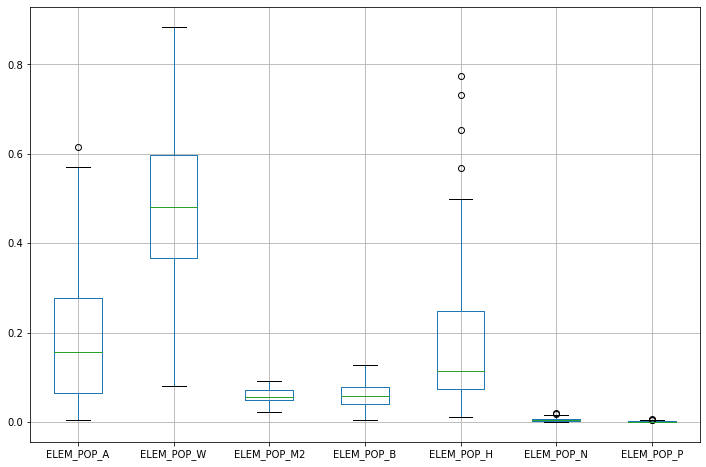

In [233]:
ax, props = spas_grouped.boxplot(column=['{}_POP_A'.format(grade), '{}_POP_W'.format(grade), '{}_POP_M2'.format(grade),\
                                        '{}_POP_B'.format(grade), '{}_POP_H'.format(grade), '{}_POP_N'.format(grade), '{}_POP_P'.format(grade)],
                                        figsize=(12,8), labels=['A', 'W', 'M2', 'B', 'H', 'N', 'P'], return_type='both')


In [370]:
outliers = [flier.get_ydata() for flier in props["fliers"]]
# boxes = [box.get_ydata() for box in props["boxes"]]
# medians = [median.get_ydata() for median in props["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in props["whiskers"]]

print(outliers)
print(boxes)
print(whiskers)

[array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([0.15235792]), array([0.46666667, 0.45255474, 0.53742204, 0.4646098 , 0.57692308,
       0.50199203, 0.47773279, 0.52835821, 0.5046729 , 0.71914132]), array([0.01796407, 0.03187251]), array([0.00729927, 0.00510204])]
[array([0.05668449, 0.05668449, 0.29580762, 0.29580762, 0.05668449]), array([0.36738161, 0.36738161, 0.65271883, 0.65271883, 0.36738161]), array([0.04347585, 0.04347585, 0.07163009, 0.07163009, 0.04347585]), array([0.04515918, 0.04515918, 0.07964514, 0.07964514, 0.04515918]), array([0.07494121, 0.07494121, 0.19323368, 0.19323368, 0.07494121]), array([0.00254453, 0.00254453, 0.00808084, 0.00808084, 0.00254453]), array([0.        , 0.        , 0.00194742, 0.00194742, 0.        ])]
[array([0.05668449, 0.00990099]), array([0.29580762, 0.62454545]), array([0.36738161, 0.10554562]), array([0.65271883, 0.87671233]), array([0.04347585, 0.02390438]), array([0.07163009, 0.08724832]), array([0.045159

In [235]:
A_outliers = spas_grouped['{}_POP_A'.format(grade)].isin(outliers[0])
W_outliers = spas_grouped['{}_POP_W'.format(grade)].isin(outliers[1])
M2_outliers = spas_grouped['{}_POP_M2'.format(grade)].isin(outliers[2])
B_outliers = spas_grouped['{}_POP_B'.format(grade)].isin(outliers[3])
H_outliers = spas_grouped['{}_POP_H'.format(grade)].isin(outliers[4])
N_outliers = spas_grouped['{}_POP_N'.format(grade)].isin(outliers[5])
P_outliers = spas_grouped['{}_POP_P'.format(grade)].isin(outliers[6])

# outliers[0].contain(526)


In [243]:
asian = spas_grouped[A_outliers]
asian
#Districts with Asian outliers

,ELEM_POP_A,ELEM_POP_W,ELEM_POP_M2,ELEM_POP_B,ELEM_POP_H,ELEM_POP_N,ELEM_POP_P,ELEM_POP
ELEM_CODE,,,,,,,,
RLC,0.614595,0.194983,0.051311,0.068415,0.057013,0.010262,0.003421,1.0


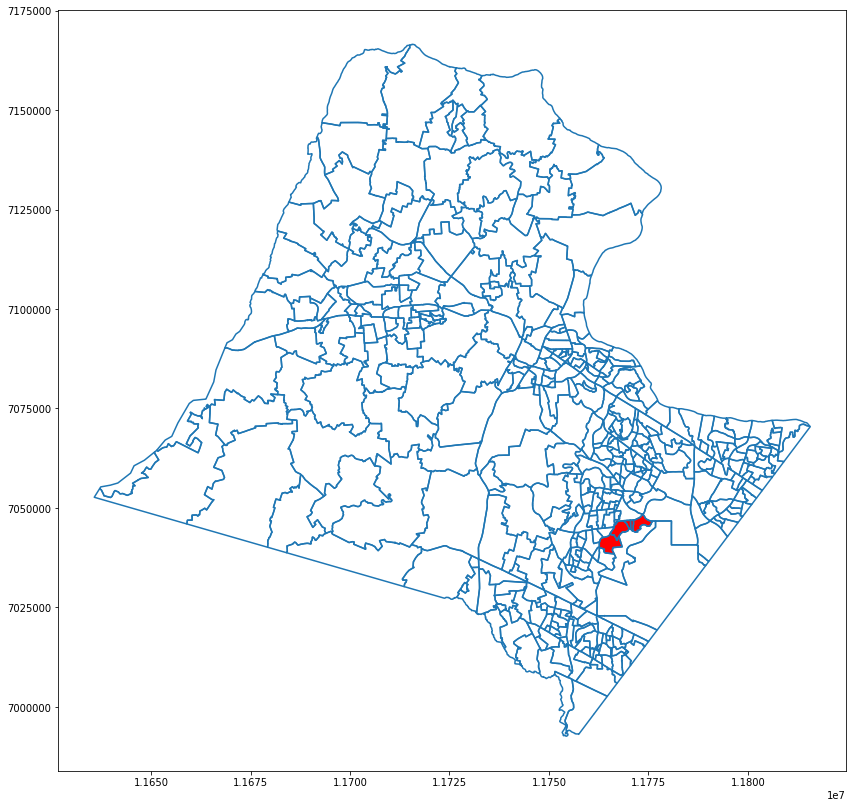

In [242]:
ax = spas.boundary.plot(figsize=(15,14))
spas[spas['ELEM_CODE'].isin(asian.index)].plot(ax=ax, color='red')

In [136]:
spas_grouped[W_outliers]
#Districts with White outliers

,ELEM_POP_A,ELEM_POP_W,ELEM_POP_M2,ELEM_POP_B,ELEM_POP_H,ELEM_POP_N,ELEM_POP_P,ELEM_POP
ELEM_CODE,,,,,,,,


In [137]:
spas_grouped[M2_outliers]
#Districts with multi-racial outliers

,ELEM_POP_A,ELEM_POP_W,ELEM_POP_M2,ELEM_POP_B,ELEM_POP_H,ELEM_POP_N,ELEM_POP_P,ELEM_POP
ELEM_CODE,,,,,,,,


In [138]:
spas_grouped[B_outliers]

#Districts with Black outliers

,ELEM_POP_A,ELEM_POP_W,ELEM_POP_M2,ELEM_POP_B,ELEM_POP_H,ELEM_POP_N,ELEM_POP_P,ELEM_POP
ELEM_CODE,,,,,,,,


In [244]:
hispanics = spas_grouped[H_outliers]
hispanics
#Districts with Hispanic outliers

Index(['GUI', 'RRD', 'SUG', 'SUL'], dtype='object', name='ELEM_CODE')

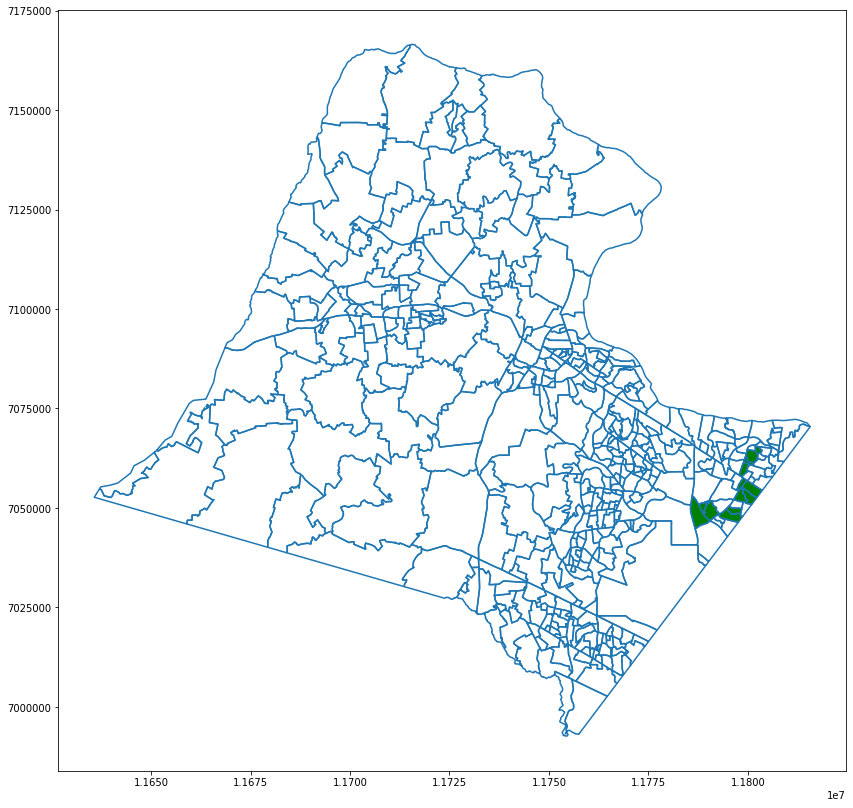

In [224]:
ax = spas.boundary.plot(figsize=(15,14))
spas[spas['ELEM_CODE'].isin(hispanics.index)].plot(ax=ax, color='green')

In [141]:
native = spas_grouped[N_outliers]
native
#Districts with Native Americans outliers

,ELEM_POP_A,ELEM_POP_W,ELEM_POP_M2,ELEM_POP_B,ELEM_POP_H,ELEM_POP_N,ELEM_POP_P,ELEM_POP
ELEM_CODE,,,,,,,,
CCE,0.569923,0.243295,0.052682,0.056513,0.055556,0.021073,0.000958,1.0
PMK,0.187719,0.342105,0.059649,0.080702,0.312281,0.017544,0.000000,1.0


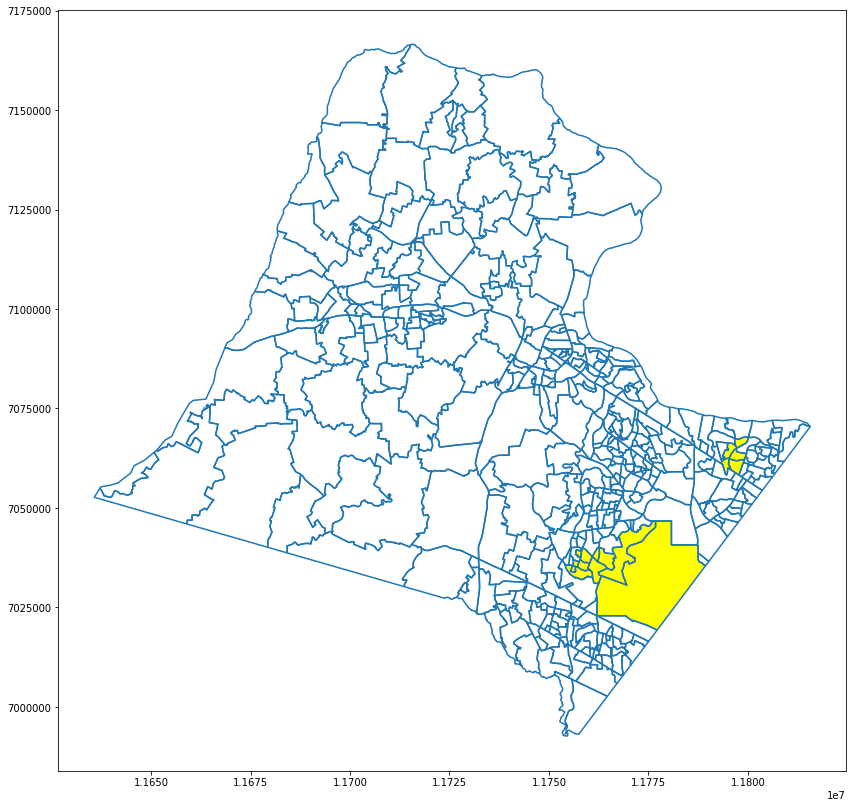

In [225]:
ax = spas.boundary.plot(figsize=(15,14))
spas[spas['ELEM_CODE'].isin(native.index)].plot(ax=ax, color='yellow')

In [143]:
highlanders = spas_grouped[P_outliers]
highlanders
#Districts with Pacific Islanders outliers

,ELEM_POP_A,ELEM_POP_W,ELEM_POP_M2,ELEM_POP_B,ELEM_POP_H,ELEM_POP_N,ELEM_POP_P,ELEM_POP
ELEM_CODE,,,,,,,,
BAL,0.085761,0.553398,0.050162,0.090615,0.207120,0.006472,0.006472,1.0
FOR,0.218695,0.202822,0.029982,0.058201,0.479718,0.005291,0.005291,1.0
MSE,0.462061,0.328426,0.055493,0.065685,0.079275,0.003398,0.005663,1.0


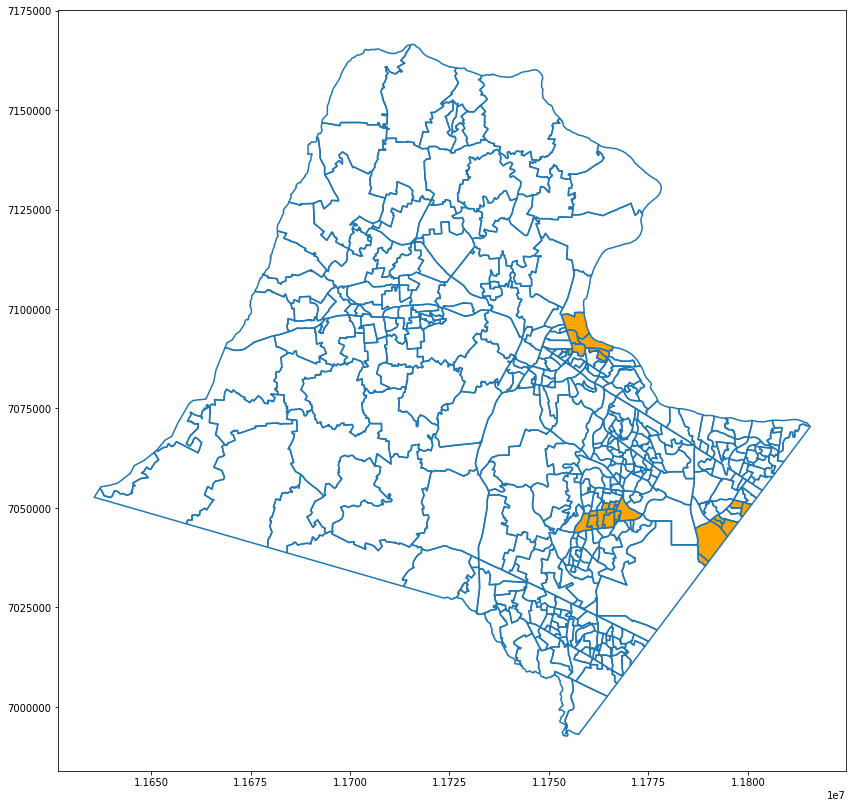

In [226]:
ax = spas.boundary.plot(figsize=(15,14))
spas[spas['ELEM_CODE'].isin(higlanders.index)].plot(ax=ax, color='orange')

## Together

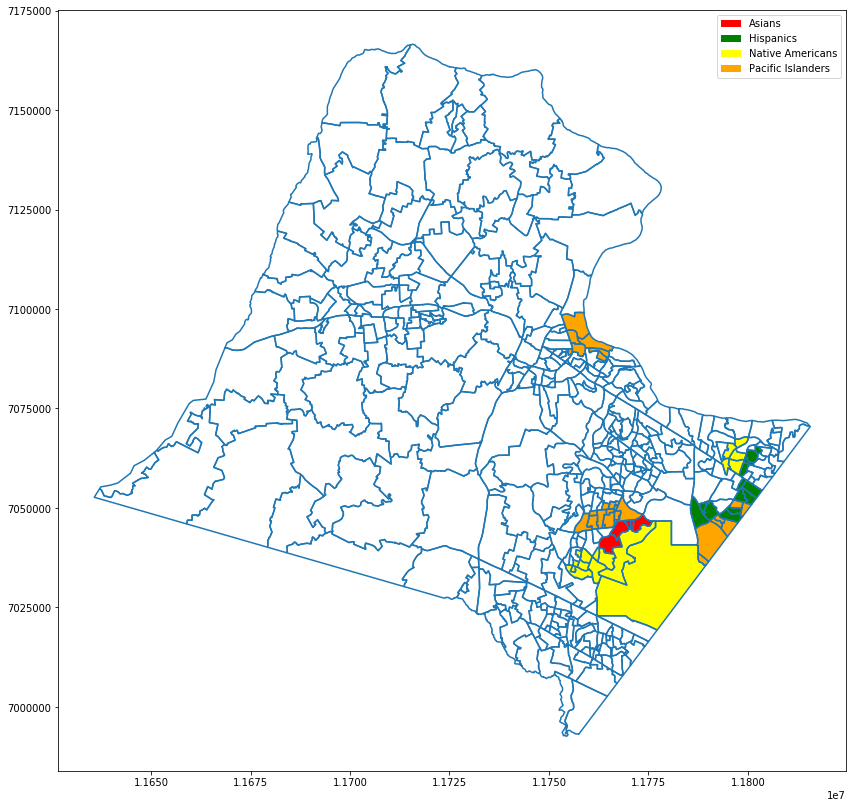

In [311]:
legend_handles = [Patch(facecolor='red', label='Asians'),
                Patch(facecolor='green', label='Hispanics'),
                Patch(facecolor='yellow', label='Native Americans'),
                Patch(facecolor='orange', label='Pacific Islanders')]

ax = spas.boundary.plot(figsize=(15,14))
spas[spas['ELEM_CODE'].isin(asian.index)].plot(ax=ax, color='red')
spas[spas['ELEM_CODE'].isin(hispanics.index)].plot(ax=ax, color='green')
spas[spas['ELEM_CODE'].isin(native.index)].plot(ax=ax, color='yellow')
spas[spas['ELEM_CODE'].isin(highlanders.index)].plot(ax=ax, color='orange')
# ax.legend
ax.legend(handles=legend_handles)

### Initial Heat (Chloropeth) Maps of Ethnic Populations

In [394]:
grade='TOT'
cols = ['TOT_POP_A' , 'TOT_POP_W' , 'TOT_POP_M2' ,
             'TOT_POP_B' , 'TOT_POP_H' , 'TOT_POP_N' , 'TOT_POP_P', 'TOT_POP']
spas_heatmap = spas.loc[:, ['TOT_POP_A' , 'TOT_POP_W' , 'TOT_POP_M2' ,
             'TOT_POP_B' , 'TOT_POP_H' , 'TOT_POP_N' , 'TOT_POP_P', 'TOT_POP', 'geometry']]
spas_heatmap.loc[:, cols] = spas_heatmap.loc[:, cols].div(spas_heatmap.TOT_POP, axis=0)
spas_heatmap.replace(float('NaN'), 0, inplace=True)
spas_heatmap

,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,TOT_POP,geometry
0,0.021277,0.787234,0.000000,0.042553,0.148936,0.000000,0.0,1.0,"POLYGON ((11725868.086 7152149.054, 11725870.6..."
1,0.000000,0.873684,0.052632,0.000000,0.063158,0.010526,0.0,1.0,"POLYGON ((11726805.147 7160565.439, 11726826.6..."
2,0.000000,0.647059,0.000000,0.058824,0.294118,0.000000,0.0,1.0,"POLYGON ((11720159.464 7099502.139, 11720172.1..."
3,0.030888,0.791506,0.054054,0.030888,0.088803,0.003861,0.0,1.0,"POLYGON ((11694466.485 7097608.657, 11694418.5..."
4,0.048128,0.909091,0.016043,0.000000,0.026738,0.000000,0.0,1.0,"POLYGON ((11715899.154 7166497.655, 11715932.1..."
...,...,...,...,...,...,...,...,...,...
441,0.250000,0.000000,0.000000,0.000000,0.750000,0.000000,0.0,1.0,"POLYGON ((11742492.065 7035458.721, 11742093.8..."
442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,"POLYGON ((11739190.831 7024321.727, 11738873.1..."
443,0.465909,0.318182,0.045455,0.136364,0.022727,0.011364,0.0,1.0,"POLYGON ((11750040.835 7018714.071, 11748910.3..."
444,0.641304,0.173913,0.097826,0.010870,0.065217,0.010870,0.0,1.0,"POLYGON ((11749808.274 7025419.452, 11749714.4..."


In [389]:
len(spas_heatmap[spas_heatmap['TOT_POP_W'.format(grade)] > 0.8])

74

Text(0.5, 1, 'Asians')

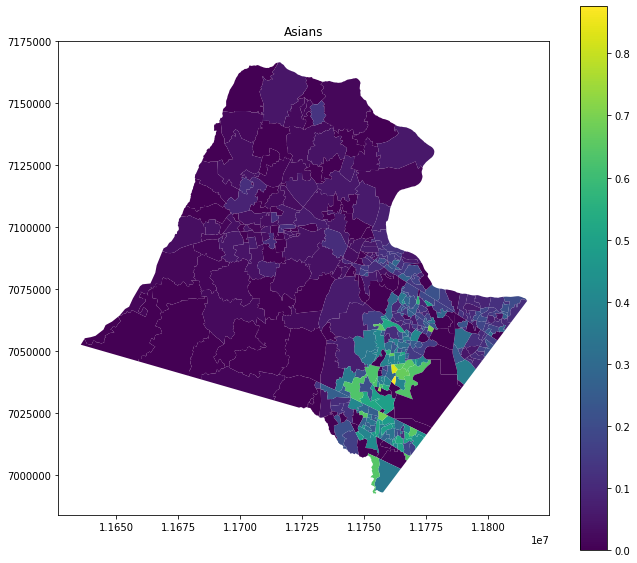

In [360]:
# Initial heatmap with raw counts
# ax = spas.plot(column='{}_POP_A'.format(grade), legend=True, figsize=(11,10))

ax = spas_heatmap.plot(column='{}_POP_A'.format(grade), legend=True, figsize=(11,10))
ax.set_title('Asians')

Text(0.5, 1, 'Whites')

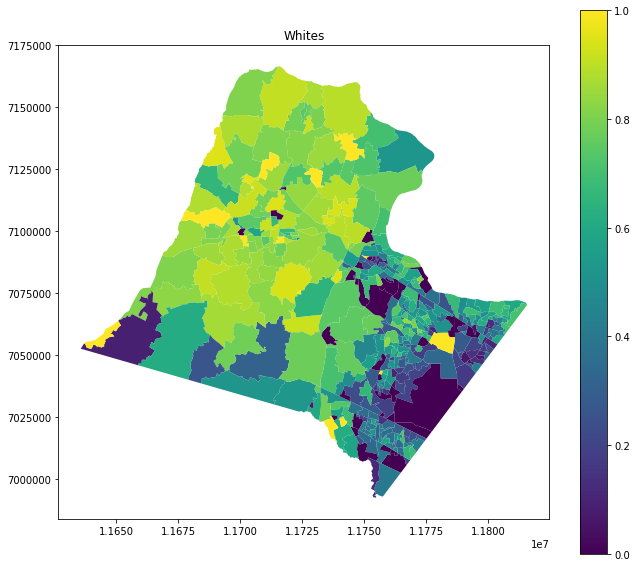

In [361]:
ax = spas_heatmap.plot(column='{}_POP_W'.format(grade), legend=True, figsize=(11,10))
ax.set_title('Whites')

Text(0.5, 1, 'Blacks')

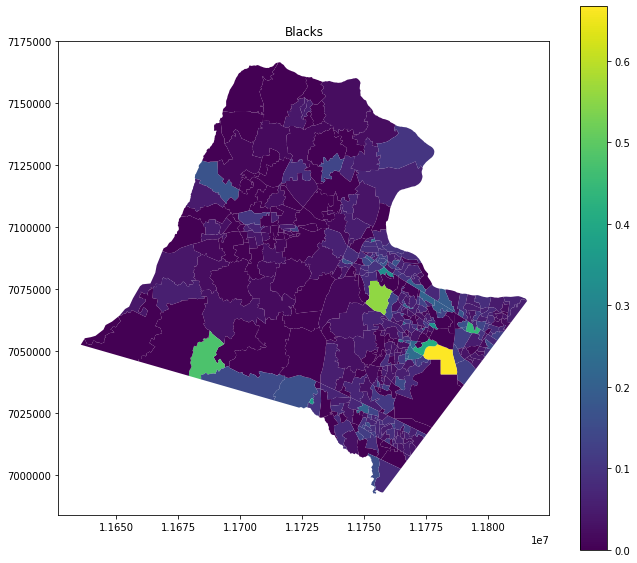

In [362]:
ax = spas_heatmap.plot(column='{}_POP_B'.format(grade), legend=True, figsize=(11,10))
ax.set_title('Blacks')

Text(0.5, 1, 'Mixed')

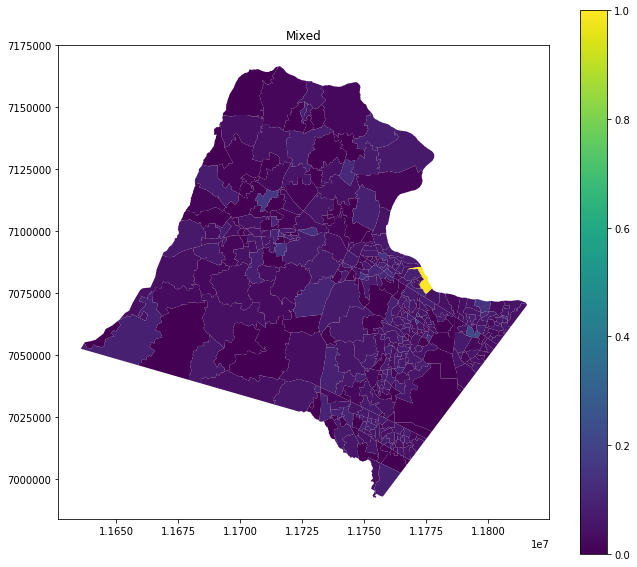

In [363]:
ax = spas_heatmap.plot(column='{}_POP_M2'.format(grade), legend=True, figsize=(11,10))
ax.set_title('Mixed')

Text(0.5, 1, 'Hispanics')

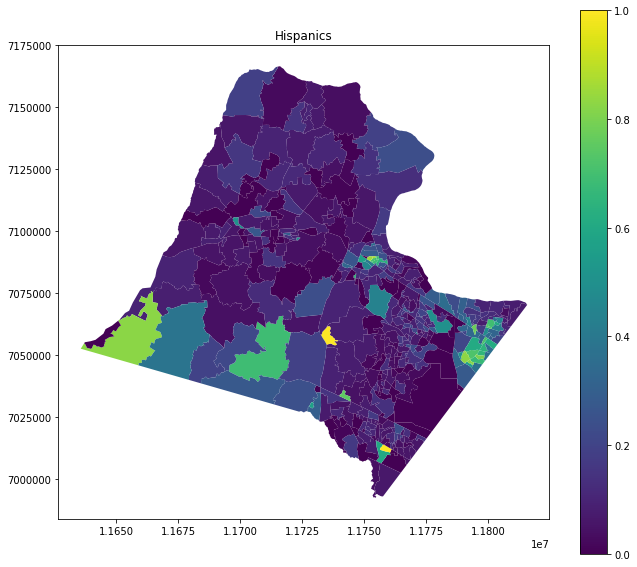

In [364]:
ax = spas_heatmap.plot(column='{}_POP_H'.format(grade), legend=True, figsize=(11,10))
ax.set_title('Hispanics')

Text(0.5, 1, 'Native Americans')

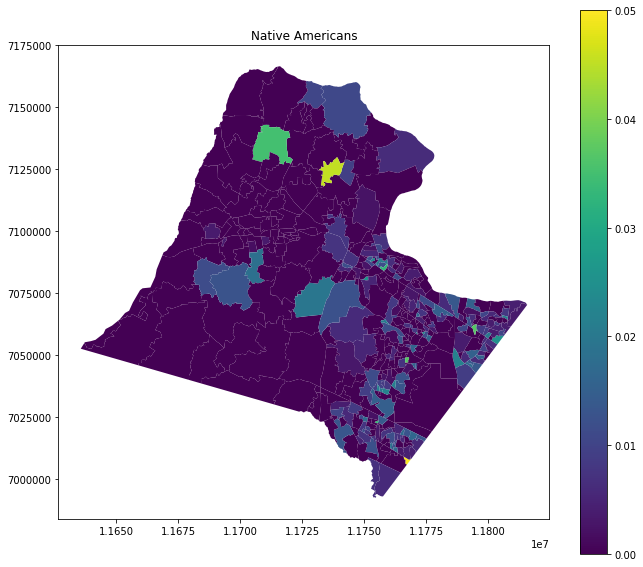

In [365]:
ax = spas_heatmap.plot(column='{}_POP_N'.format(grade), legend=True, figsize=(11,10))
ax.set_title('Native Americans')

Text(0.5, 1, 'Pacific Islanders')

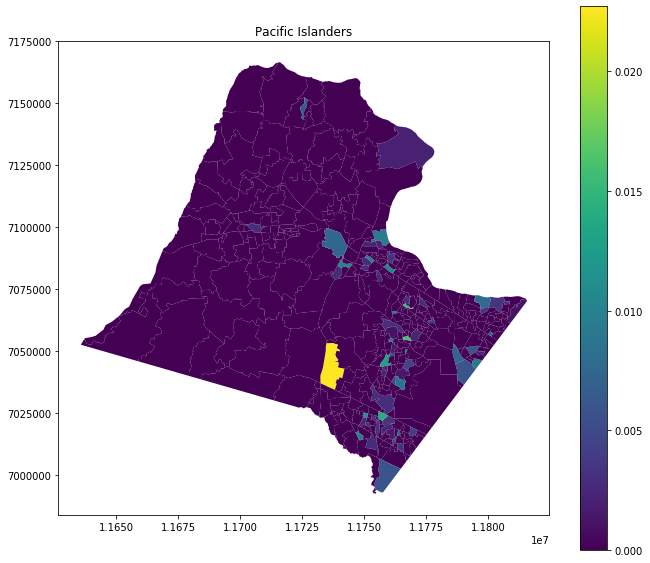

In [366]:
ax = spas_heatmap.plot(column='{}_POP_P'.format(grade), legend=True, figsize=(11,10))
ax.set_title('Pacific Islanders')

## Conclusions for Original Data

#### What is happening?
Define overrepresented as anything above the extreme upper whisker.

Interesting observations...
1. There is no overrepresentation of black or white population
2. Asians are overrepresented in one district (RLC)
3. Hispanics are overrepresented in 4 districts
4. Native Americans are also overrepresented in 2 districts but by numbers that are not significant
5. Pacific highlanders are also overrepresented in 3 districts

BUF was not a problem when we run by proportions instead of raw numbers

In [ ]:
# Conclusion may have to change when we change the measure of outliers

# Comparison to data generated by Algorithms

In [259]:
#spas_processed = gpd.read_file('new_SPAs_2017_2018.json', driver='GeoJSON')
# sa = json.loads('./results/SA/run7_ES_SA.json')
# shc = gpd.read_file('./results/SHC/run7_ES_SHC.json', driver='GeoJSON')
# ts = gpd.read_file('./results/TS/run7_ES_TS.json', driver='GeoJSON')

import json

def retrieve_output_data(algo, level, plan):
    output_df = pd.DataFrame({"SPA": [], "NEW_{}_CODE".format(grade): []})  #grade is a global variable
    result_dir = 'results'
    #Load the file as json. 
    with open('{}/{}/run7_{}_{}.json'.format(result_dir, algo, level, algo)) as file:
        #readlines() reads the file as string and loads() loads it into a dict
        obj = json.loads(''.join(file.readlines()))

        #Then iterate its items() as key value pairs
        for spa_code, elem_code in obj[str(plan)]['info']['Final']['zoneIds'].items():
            output_df.loc[len(output_df.index)] = [spa_code, elem_code]

    return output_df
#new line to run the newly downloaded json files, should move around anywhere.

## Output Plan 1

### Simulated Annealing (SA)

In [260]:
sa_output_df = retrieve_output_data('SA', 'ES', 1)
sa_output_df.head()

#To change everything down to SHC or TS

,SPA,NEW_ELEM_CODE
0,CL01,LUC
1,CL02,LUC
2,CL02.1,WAT
3,CL03,WAT
4,CL04,FHR


In [261]:
new_spas_sa = pd.merge(spas, sa_output_df, on='SPA')
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",KWC
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",RHL
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [262]:
new_spas_sa_ethnic = new_spas_sa[['NEW_{}_CODE'.format(grade) , '{}_POP_A'.format(grade) , '{}_POP_W'.format(grade) , '{}_POP_M2'.format(grade) ,\
             '{}_POP_B'.format(grade) , '{}_POP_H'.format(grade) , '{}_POP_N'.format(grade) , '{}_POP_P'.format(grade), '{}_POP'.format(grade), 'geometry']]
new_spas_sa_grouped_raw = new_spas_sa_ethnic.groupby(['NEW_{}_CODE'.format(grade) ]).sum()
new_spas_sa_grouped = new_spas_sa_grouped_raw.div(new_spas_sa_grouped_raw['ELEM_POP'], axis=0)
new_spas_sa_grouped.head()

#when generalizing one place to change and use the FORMAT style

,ELEM_POP_A,ELEM_POP_W,ELEM_POP_M2,ELEM_POP_B,ELEM_POP_H,ELEM_POP_N,ELEM_POP_P,ELEM_POP
NEW_ELEM_CODE,,,,,,,,
ALD,0.058824,0.631373,0.074510,0.070588,0.160784,0.003922,0.000000,1.0
ALG,0.109620,0.572707,0.087248,0.051454,0.170022,0.006711,0.002237,1.0
ASH,0.226475,0.460925,0.078150,0.079745,0.153110,0.000000,0.001595,1.0
BAL,0.109969,0.641316,0.055498,0.076053,0.110997,0.002055,0.004111,1.0
BAN,0.009901,0.777228,0.024752,0.054455,0.128713,0.004950,0.000000,1.0


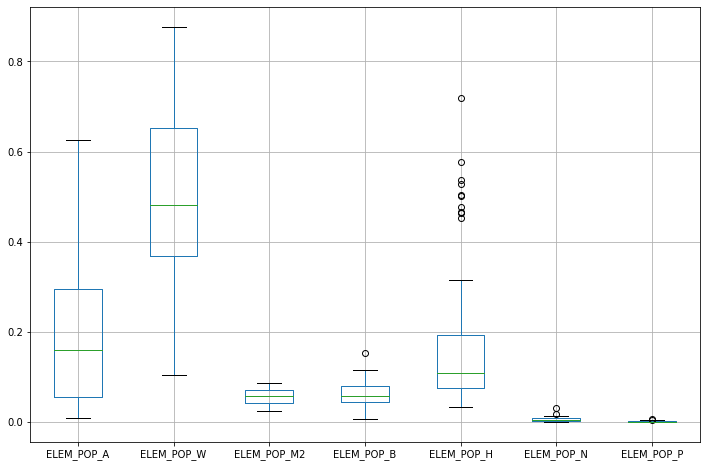

In [272]:
ax, props = new_spas_sa_grouped.boxplot(column=['{}_POP_A'.format(grade), '{}_POP_W'.format(grade), '{}_POP_M2'.format(grade),\
                                        '{}_POP_B'.format(grade), '{}_POP_H'.format(grade), '{}_POP_N'.format(grade), '{}_POP_P'.format(grade)],
                                        figsize=(12,8), labels=['A', 'W', 'M2', 'B', 'H', 'N', 'P'], return_type='both')


In [264]:
sa_outliers = [flier.get_ydata() for flier in props["fliers"]]
print(sa_outliers)


[array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([0.15235792]), array([0.46666667, 0.45255474, 0.53742204, 0.4646098 , 0.57692308,
       0.50199203, 0.47773279, 0.52835821, 0.5046729 , 0.71914132]), array([0.01796407, 0.03187251]), array([0.00729927, 0.00510204])]


In [265]:
A_outliers = new_spas_sa_grouped['{}_POP_A'.format(grade)].isin(sa_outliers[0])
W_outliers = new_spas_sa_grouped['{}_POP_W'.format(grade)].isin(sa_outliers[1])
M2_outliers = new_spas_sa_grouped['{}_POP_M2'.format(grade)].isin(sa_outliers[2])
B_outliers = new_spas_sa_grouped['{}_POP_B'.format(grade)].isin(sa_outliers[3])
H_outliers = new_spas_sa_grouped['{}_POP_H'.format(grade)].isin(sa_outliers[4])
N_outliers = new_spas_sa_grouped['{}_POP_N'.format(grade)].isin(sa_outliers[5])
P_outliers = new_spas_sa_grouped['{}_POP_P'.format(grade)].isin(sa_outliers[6])

# outliers[0].contain(526)


In [266]:
sa_black = new_spas_sa_grouped[B_outliers]
sa_black

,ELEM_POP_A,ELEM_POP_W,ELEM_POP_M2,ELEM_POP_B,ELEM_POP_H,ELEM_POP_N,ELEM_POP_P,ELEM_POP
NEW_ELEM_CODE,,,,,,,,
STU,0.152358,0.400242,0.073761,0.152358,0.216445,0.004837,0.0,1.0


In [267]:
sa_hispanics = new_spas_sa_grouped[H_outliers]
sa_hispanics

,ELEM_POP_A,ELEM_POP_W,ELEM_POP_M2,ELEM_POP_B,ELEM_POP_H,ELEM_POP_N,ELEM_POP_P,ELEM_POP
NEW_ELEM_CODE,,,,,,,,
FDE,0.073171,0.300813,0.047154,0.104065,0.466667,0.006504,0.001626,1.0
FOR,0.218978,0.221411,0.031630,0.060827,0.452555,0.007299,0.007299,1.0
GUI,0.117464,0.249480,0.034304,0.055094,0.537422,0.006237,0.000000,1.0
LEE,0.049909,0.370236,0.041742,0.068058,0.464610,0.004537,0.000907,1.0
MEA,0.038462,0.294872,0.064103,0.019231,0.576923,0.006410,0.000000,1.0
PMK,0.107570,0.262948,0.023904,0.071713,0.501992,0.031873,0.000000,1.0
RRD,0.163293,0.206478,0.043185,0.101215,0.477733,0.008097,0.000000,1.0
STE,0.162687,0.207463,0.043284,0.049254,0.528358,0.005970,0.002985,1.0
SUG,0.136682,0.280374,0.036215,0.039720,0.504673,0.001168,0.001168,1.0


In [268]:
sa_native = new_spas_sa_grouped[N_outliers]
sa_native

,ELEM_POP_A,ELEM_POP_W,ELEM_POP_M2,ELEM_POP_B,ELEM_POP_H,ELEM_POP_N,ELEM_POP_P,ELEM_POP
NEW_ELEM_CODE,,,,,,,,
CRE,0.386228,0.446108,0.035928,0.056886,0.056886,0.017964,0.0,1.0
PMK,0.107570,0.262948,0.023904,0.071713,0.501992,0.031873,0.0,1.0


In [269]:
sa_highlanders = new_spas_sa_grouped[P_outliers]
sa_highlanders

,ELEM_POP_A,ELEM_POP_W,ELEM_POP_M2,ELEM_POP_B,ELEM_POP_H,ELEM_POP_N,ELEM_POP_P,ELEM_POP
NEW_ELEM_CODE,,,,,,,,
FOR,0.218978,0.221411,0.031630,0.060827,0.452555,0.007299,0.007299,1.0
MSE,0.517857,0.272959,0.056122,0.081633,0.061224,0.005102,0.005102,1.0


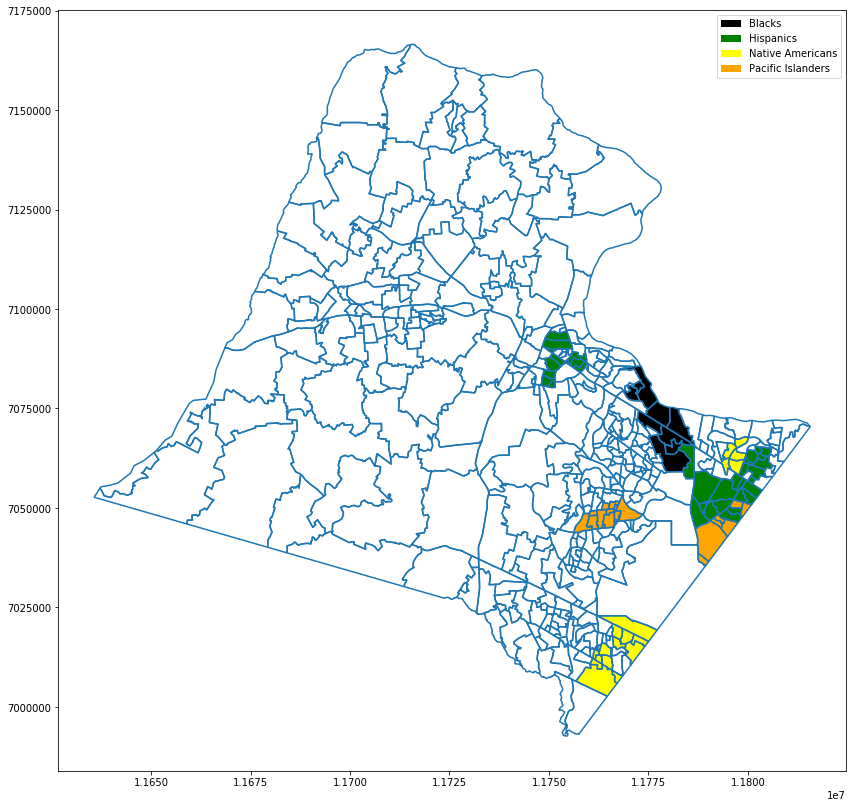

In [308]:
legend_handles = [Patch(facecolor='black', label='Blacks'),
                Patch(facecolor='green', label='Hispanics'),
                Patch(facecolor='yellow', label='Native Americans'),
                Patch(facecolor='orange', label='Pacific Islanders')]

ax = new_spas_sa.boundary.plot(figsize=(15,14))
new_spas_sa[new_spas_sa['ELEM_CODE'].isin(sa_black.index)].plot(ax=ax, color='black', label="black")
new_spas_sa[new_spas_sa['ELEM_CODE'].isin(sa_hispanics.index)].plot(ax=ax, color='green')
new_spas_sa[new_spas_sa['ELEM_CODE'].isin(sa_native.index)].plot(ax=ax, color='yellow')
new_spas_sa[new_spas_sa['ELEM_CODE'].isin(sa_highlanders.index)].plot(ax=ax, color='orange')

ax.legend(handles=legend_handles)

### Heat (Chloropeth) Maps of White against Non-White Populations

In [392]:
grade='TOT'
cols = ['TOT_POP_A' , 'TOT_POP_W' , 'TOT_POP_M2' ,
             'TOT_POP_B' , 'TOT_POP_H' , 'TOT_POP_N' , 'TOT_POP_P', 'TOT_POP']
new_spas_sa_heatmap = new_spas_sa.loc[:, ['TOT_POP_A' , 'TOT_POP_W' , 'TOT_POP_M2' ,
             'TOT_POP_B' , 'TOT_POP_H' , 'TOT_POP_N' , 'TOT_POP_P', 'TOT_POP', 'geometry']]
new_spas_sa_heatmap.loc[:, cols] = new_spas_sa_heatmap.loc[:, cols].div(new_spas_sa_heatmap.TOT_POP, axis=0)
new_spas_sa_heatmap.replace(float('NaN'), 0, inplace=True)

#whites vs. non-whites in the overall dataframe
new_spas_sa_heatmap.loc[:, 'TOT_POP_NW'] = new_spas_sa_heatmap.loc[:,'TOT_POP_A'] +  new_spas_sa_heatmap.loc[:,'TOT_POP_B'] +  new_spas_sa_heatmap.loc[:,'TOT_POP_M2']\
            +  new_spas_sa_heatmap.loc[:,'TOT_POP_H'] + new_spas_sa_heatmap.loc[:,'TOT_POP_N'] + new_spas_sa_heatmap.loc[:,'TOT_POP_P']
new_spas_sa_heatmap.drop(['TOT_POP_A', 'TOT_POP_B', 'TOT_POP_H', 'TOT_POP_M2', 'TOT_POP_N', 'TOT_POP_P'], axis='columns')

,TOT_POP_W,TOT_POP,geometry,TOT_POP_NW
0,0.787234,1.0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",0.212766
1,0.873684,1.0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",0.126316
2,0.647059,1.0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",0.352941
3,0.791506,1.0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",0.208494
4,0.909091,1.0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",0.090909
...,...,...,...,...
441,0.000000,1.0,"POLYGON ((11742492.065 7035458.721, 11742093.8...",1.000000
442,0.000000,0.0,"POLYGON ((11739190.831 7024321.727, 11738873.1...",0.000000
443,0.318182,1.0,"POLYGON ((11750040.835 7018714.071, 11748910.3...",0.681818
444,0.173913,1.0,"POLYGON ((11749808.274 7025419.452, 11749714.4...",0.826087


In [388]:
len(new_spas_sa_heatmap[new_spas_sa_heatmap['TOT_POP_W'.format(grade)] > 0.8])

74

Text(0.5, 1, 'Non Whites')

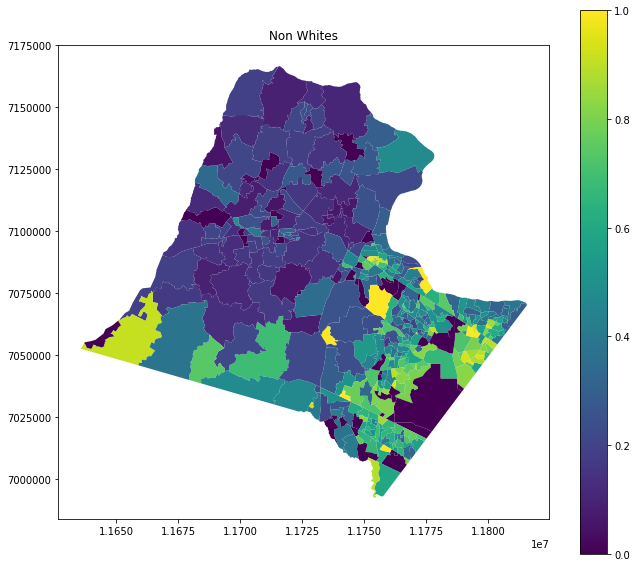

In [393]:
# Initial heatmap with raw counts
# ax = new_spas_sa.plot(column='{}_POP_A'.format(grade), legend=True, figsize=(11,10))

ax = new_spas_sa_heatmap.plot(column='{}_POP_NW'.format(grade), legend=True, figsize=(11,10))
ax.set_title('Non Whites')

Text(0.5, 1, 'Whites')

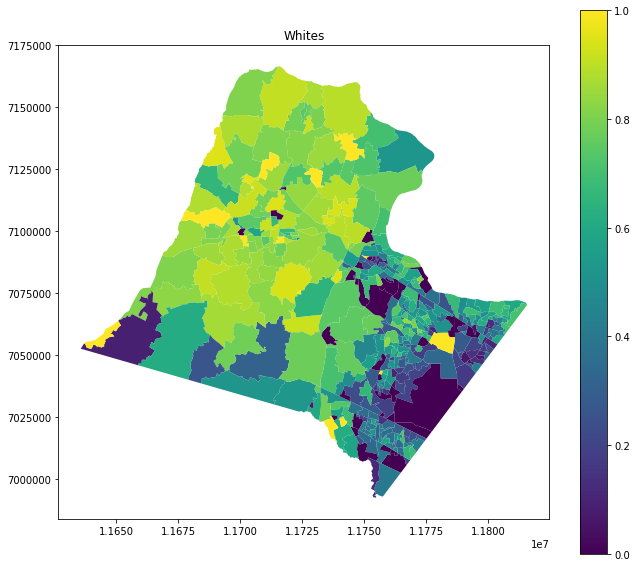

In [382]:
ax = new_spas_sa_heatmap.plot(column='{}_POP_W'.format(grade), legend=True, figsize=(11,10))
ax.set_title('Whites')

## Conclusions for New Data after Algorithms

#### What is happening?
Define overrepresented as anything above the extreme upper whisker.

Interesting observations...
1. There is still no overrepresentation of white population
2. Asians are no longer overrepresented
3. Hispanics are overrepresented in 10 districts now
4. Native Americans are also overrepresented in 2 districts but by numbers that are not significant
5. Pacific highlanders are also overrepresented in 3 districts
6. Blacks are overrepresented in 1 district

How do I fit in the gerrychain in all of this?

In [ ]:
#Conclusion may have to change based on the new measure of average differences

### Challenges and Comments

In [395]:
spas.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_N,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6..."
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6..."
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1..."
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5..."
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1..."


In [397]:
new_spas_sa.head()

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry,NEW_ELEM_CODE
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6...",LOV
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6...",LOV
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1...",KWC
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5...",RHL
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1...",LOV


In [398]:
# spas and new_spas_sa are the same except for the new column added. (NEW_ELEM_CODE)
# The challenge faced is that in grouping by districts, the 'geometry' column cannot be summed and thus
# is not included in the merged_df.
# Thus, heatmaps above are for individual planning zones which do not change for both spas and new_spas_sa, hence both heatmaps are equivalent
# This causes problems in comparing the new plans to the old ones

In [ ]:
## For bullet 2 and 3

# I searched for a pandas method to help find the sum of average differences, but couldn't find any simple solution.
#Some help here would be greatly appreciated. For now, I have used >0.8 as the measure

In [ ]:
## For bullet 5

# I guess the investigation of repeating outliers should be based on the different measure you suggested in point 2 and 3
# rather than the one I used. Some help with this will be appreciated.

In [ ]:
## For the second to last point (bullet 6)

# I compared the other algorithms (SA, SHC, TS) but the results were very similar so I decided to focus on SA for now.

# Also, only one output file eg. run_7_SA_ES.json was produced per algorithm, so I'm unable to compare different plans by the same algorithm


In [ ]:
#On the gerrychain

#It never ceases to finish running
#I'm curious as to what this part of the code does since it is the part that keeps running

#run recom chain
'''
rW = []
for rpart in recom_chain:
    rW.append(sorted(rpart["WnW"].percents("White")))
'''